In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# sns.set_style("darkgrid")
sns.set_theme(rc = {"figure.figsize": (12, 4)})

---
Dans cette séance de TP, vous allez explorer et analyser le jeu de données
"Titanic" en utilisant la méthode "groupby" de pandas. L’objectif est d’extraire
des informations statistiques en fonction de différentes catégories pour mieux
comprendre la population de passagers à bord du Titanic:

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


---
❶ Quelle est la distribution moyenne d’age pour tous les passagers en
fonction de leur sexe ?

In [5]:

grouped = df.groupby(['sex'])['age'].mean()

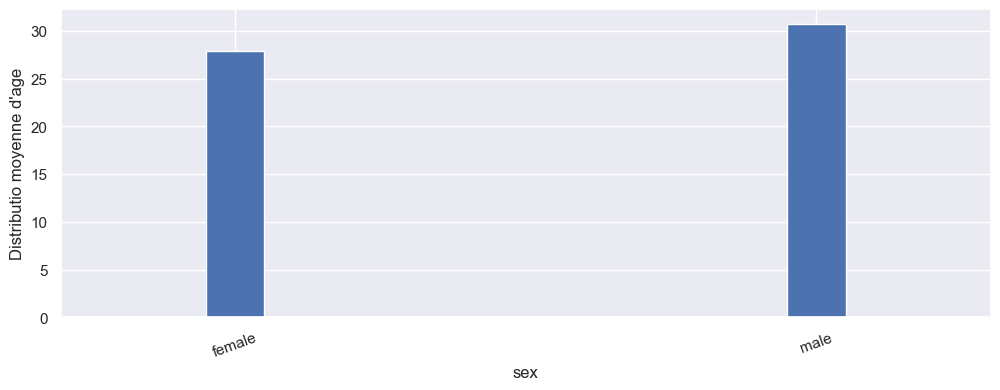

In [6]:

df.groupby(['sex'])['age'].mean().plot(kind = 'bar', width = .1)
plt.xticks(rotation = 20)
plt.ylabel('Distributio moyenne d\'age')
plt.show()

---
❷ Donner la distribution moyenne d’age de passagers en fonction de leur
sexe et la classe dans laquelle ils avaient voyagé ?

In [7]:

df.groupby(['sex','class'])['age'].mean()

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/1964981076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','class'])['age'].mean()


sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/3065553206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','class'])['age'].mean().sort_values(ascending=True).plot(kind = 'bar', color='gray')


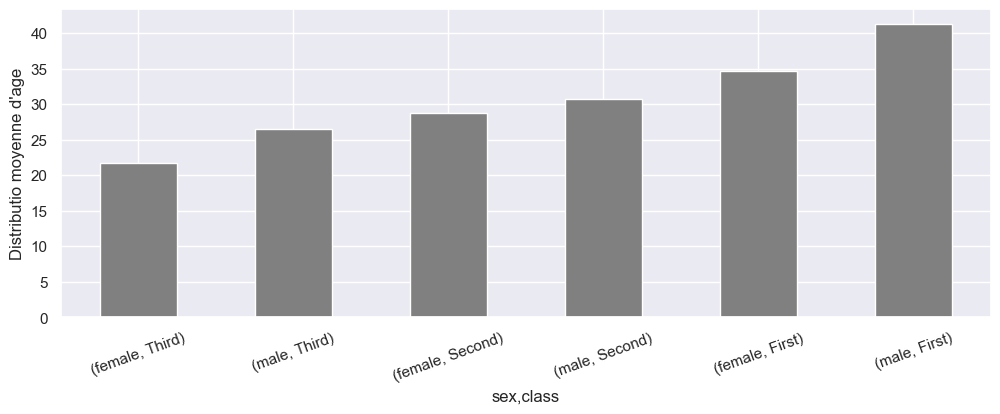

In [8]:

df.groupby(['sex','class'])['age'].mean().sort_values(ascending=True).plot(kind = 'bar', color='gray')
plt.xticks(rotation = 20)
plt.ylabel('Distributio moyenne d\'age')
plt.show()

---
❸ Regrouper les données par classe et calculer la moyenne d’âge ainsi que
la somme des tarifs pour chaque classe

In [9]:

grouped = df.groupby(['class'])[['age','fare']].agg({'age': 'mean',
                                                    'fare': 'sum'})
grouped

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/2002501420.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['class'])[['age','fare']].agg({'age': 'mean',


,age,fare
class,,
First,38.233441,18177.4125
Second,29.877630,3801.8417
Third,25.140620,6714.6951


In [10]:

grouped.reset_index()

,class,age,fare
0,First,38.233441,18177.4125
1,Second,29.877630,3801.8417
2,Third,25.140620,6714.6951


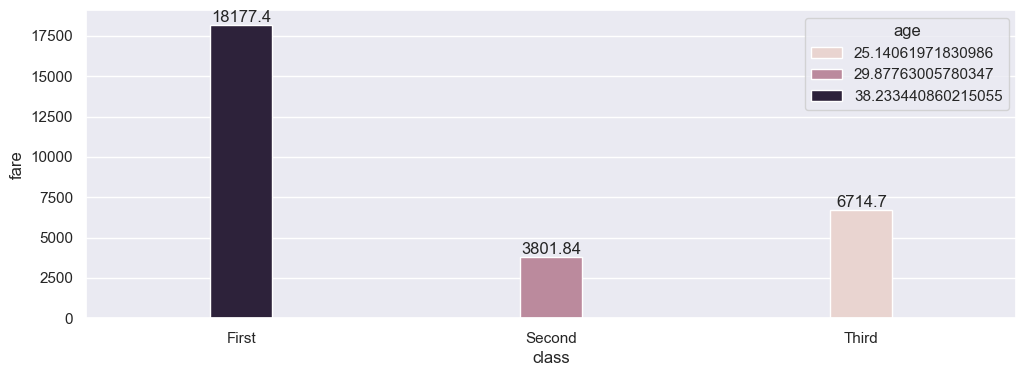

In [11]:

ax = sns.barplot(x = 'class', y = 'fare', hue = 'age', data = grouped.reset_index(), width=.2)
for bar in ax.containers: ax.bar_label(bar)


---
❹ Donnez la moyenne d’âge pour chaque classe des enfants de moins de
10 ans.

In [12]:

df[df['age']<=10].groupby('class')['age'].mean()

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/2334055162.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['age']<=10].groupby('class')['age'].mean()


class
First     2.306667
Second    3.490000
Third     4.702727
Name: age, dtype: float64

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/1407418358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['age'] <= 10].groupby('class')['age'].mean().plot(kind = 'bar', width = 0.1)


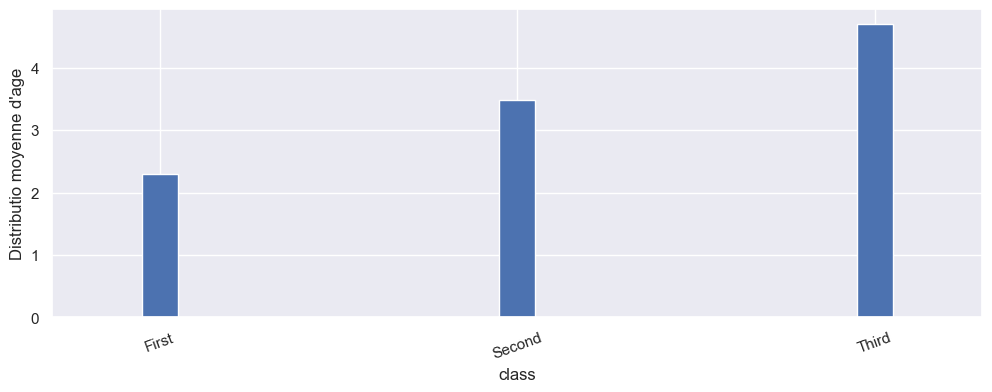

In [13]:

df[df['age'] <= 10].groupby('class')['age'].mean().plot(kind = 'bar', width = 0.1)
plt.xticks(rotation = 20)
plt.ylabel('Distributio moyenne d\'age')
plt.show()

--- 
❺ Donner la distribution moyenne du tarif par classe en fonction de la tranche d'age 'Enfant' et 'Personne agee'.

Pour cela, il faut d'abord créer une colonne pour les categories d'age, par exemple:

 - de 0 a 10 ans  => 'Enfant'
 - de 10 a 18 ans => 'Adolescent'
 - de 18 a 50 ans => 'Jeune'
 - de 50 a 70 ans => 'Age avancé'
 - de 70 et +     => 'Personne agée'

In [14]:
def classement(age): 
    if(age < 10): return 'Enfant'
    elif ((age >= 10) & (age < 18)): return 'Adolescent'
    elif ((age >= 18) & (age < 50)): return 'Jeune'
    elif ((age >= 50) & (age < 70)): return 'Age avancé'
    else: return 'Personne agée'

In [15]:
df['tranche_age'] = df['age'].apply(classement)

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,tranche_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Jeune
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Jeune
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Jeune
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Jeune
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Jeune


In [17]:

myfilter = (df['tranche_age'] == 'Personne agée') | (df['tranche_age'] == 'Enfant')

df[myfilter].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,tranche_age
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,Personne agée
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,Enfant
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,Enfant
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,Enfant
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,Personne agée


In [18]:
df[myfilter].groupby('class')['fare'].mean() 

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/3439027496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[myfilter].groupby('class')['fare'].mean()


class
First     64.504727
Second    20.218824
Third     16.977683
Name: fare, dtype: float64

In [19]:
# df[-myfilter].groupby('class')['fare'].mean()

/var/folders/4b/jsrdk49d0ggbvtkdk6m5c5c40000gn/T/ipykernel_11240/658697452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[myfilter].groupby('class')['fare'].mean().sort_values(ascending=False).plot(kind = 'bar', width = .2)


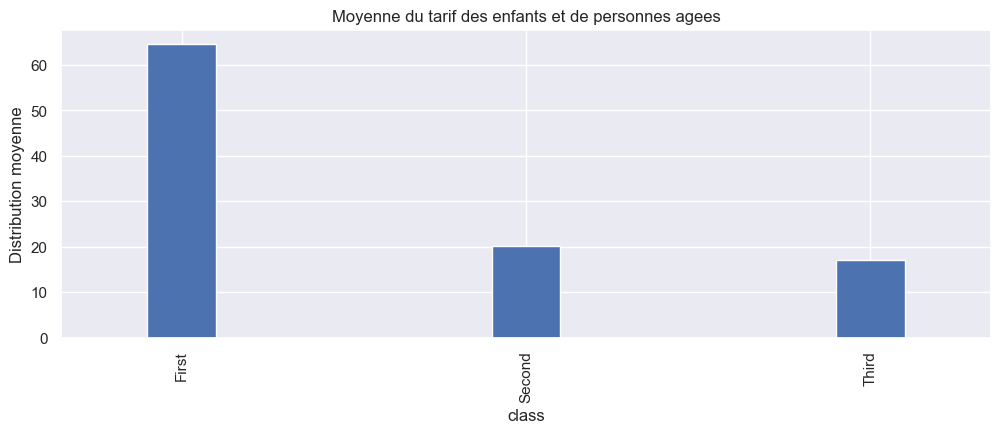

In [20]:

df[myfilter].groupby('class')['fare'].mean().sort_values(ascending=False).plot(kind = 'bar', width = .2)
plt.ylabel('Distribution moyenne')
plt.title('Moyenne du tarif des enfants et de personnes agees')
plt.show()